In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## MLE solutions of lognorm observation distribution

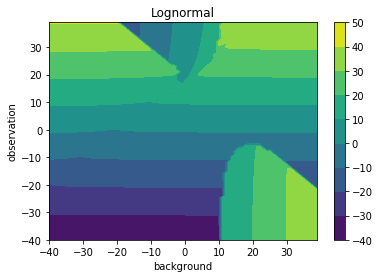

In [10]:
def f(xt, xb, y, sigma2b):
    s = y + np.sqrt(2) - xt
    return s - np.exp(-np.log(2)**2 - (s**2 + (xb-y-np.sqrt(2))*s) * (np.log(2)/sigma2b)**2)

sibma2b = 4
Xb, Y = np.meshgrid(np.arange(-40, 40, 1), np.arange(-40, 40, 1))
Xt_lognorm = []
for xb, y in np.vstack([Xb.ravel(), Y.ravel()]).T:
    Xt_lognorm.append(optimize.root(lambda x: f(x, xb, y, sibma2b), [10]).x)
    
Xt_lognorm = np.reshape(Xt_lognorm, Xb.shape)

plt.contourf(Xb, Y, Xt_lognorm)
plt.colorbar()
plt.xlabel('background')
plt.ylabel('observation')
plt.title('Lognormal');

## MLE solutions of observation normal distribution

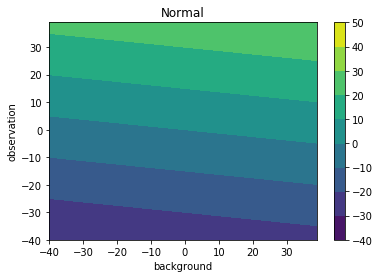

In [7]:
sigma2b = 4
Xb, Y = np.meshgrid(np.arange(-40, 40, 1), np.arange(-40, 40, 1))
Xt_norm = []
for xb, y in np.vstack([Xb.ravel(), Y.ravel()]).T:
    xt = (xb / sigma2b**2 + y / 2) / (1 / sigma2b + 1 / 2)
    Xt_norm.append(xt)
    
Xt_norm = np.reshape(Xt_norm, Xb.shape)

plt.contourf(Xb, Y, Xt_norm, levels=np.arange(-40, 60, 10))
plt.colorbar()
plt.xlabel('background')
plt.ylabel('observation')
plt.title('Normal');

### different between these two

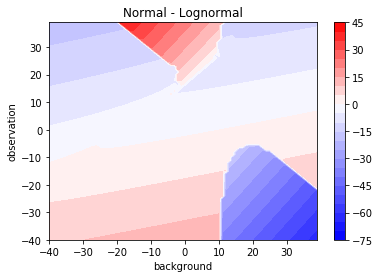

In [9]:
import matplotlib as mpl

class MidpointNormalize(mpl.colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


diff = Xt_norm - Xt_lognorm
#cs = plt.contour(Xb, Y, diff, colors='k', levels=np.arange(-75, 50, 5))
#plt.clabel(cs, np.arange(-10, 10+5, 5))
plt.contourf(Xb, Y, diff, cmap='bwr', norm=MidpointNormalize(-75, 45, 0), levels=np.arange(-75, 50, 5))
plt.colorbar()
plt.xlabel('background')
plt.ylabel('observation')
plt.title('Normal - Lognormal');